# readme
descrip: plot historic and future minus historic temp (T), salt (S) and in-situ density (rho) depth profiles from buoy mooring and Sunway <br>

update history: <br>
v1.0 DL 2021Apr12 <br>
v1.1 DL 2021May24 <br>
v1.2 DL 2021May26 <br>

extra notes: <br>
paper mentioned mooring data (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5051723/) <br>
paper suggests Gulf Stream rings causes cold intermediate water (https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/JC089iC04p06575) <br>
mooring site (http://phog.umaine.edu/buoyhome.php) <br>
http://phog.umaine.edu/data/gomoos/buoy/php/historical_rt_download.php?mooring_id=M0130&buffer_name=sbe37&project=gomoos <br>
netcdf downloading site: 
http://gyre.umeoce.maine.edu/GoMoos/php/mooring_file_info.php?report=historical_files <br>
compute in-situ temp from potential temp: https://pythonhosted.org/seawater/eos80.html <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import proplot as plot
# import cartopy
# cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# import cartopy.crs as ccrs
# from cartopy.mpl.geoaxes import GeoAxes
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
import xgcm
import pop_tools
import xoak
# import xesmf as xe
import seawater as sw

# dask jupyter lab packages
# import dask
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
client = Client("tcp://10.73.3.232:45060")
client

Client Scheduler: tcp://10.73.3.232:45060 Dashboard: http://10.73.3.232:8787/status,Cluster Workers: 10 Cores: 10 Memory: 210.00 GB


# define paramteres

In [3]:
outdir='/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir + 'TSdpthProfHistFutureSunwayMooring_2021May22.png'

read Buoy Mooring data 

In [4]:
infile1 = ('/ihesp/user/dapengli/obs_dat/'
          'BuoyM0130_GulfOfMaine_2021May24/M01.sbe37.historical.1m.nc')
infile20 = ('/ihesp/user/dapengli/obs_dat/'
          'BuoyM0130_GulfOfMaine_2021May24/M01.sbe37.historical.20m.nc')
infile50 = ('/ihesp/user/dapengli/obs_dat/'
          'BuoyM0130_GulfOfMaine_2021May24/M01.sbe37.historical.50m.nc')
infile100 = ('/ihesp/user/dapengli/obs_dat/'
          'BuoyM0130_GulfOfMaine_2021May24/M01.sbe37.historical.100m.nc')
infile150 = ('/ihesp/user/dapengli/obs_dat/'
          'BuoyM0130_GulfOfMaine_2021May24/M01.sbe37.historical.150m.nc')
infile200 = ('/ihesp/user/dapengli/obs_dat/'
          'BuoyM0130_GulfOfMaine_2021May24/M01.sbe37.historical.200m.nc')
infile250 = ('/ihesp/user/dapengli/obs_dat/'
          'BuoyM0130_GulfOfMaine_2021May24/M01.sbe37.historical.250m.nc')

ds1_raw = xr.open_dataset(infile1)
print('time(1m sensor): ', ds1_raw.time[0].values,'-',ds1_raw.time[-1].values)
ds1 = ds1_raw.sel(time=slice('2004','2012'))

ds20_raw = xr.open_dataset(infile20)
print('time(20m sensor): ', ds20_raw.time[0].values,'-',ds20_raw.time[-1].values)
ds20 = ds20_raw.sel(time=slice('2004','2012'))

ds50_raw = xr.open_dataset(infile50)
print('time(50m sensor): ', ds50_raw.time[0].values,'-',ds50_raw.time[-1].values)
ds50 = ds50_raw.sel(time=slice('2004','2012'))

ds100_raw = xr.open_dataset(infile100)
print('time(100m sensor): ', ds100_raw.time[0].values,'-',ds100_raw.time[-1].values)
ds100 = ds100_raw.sel(time=slice('2004','2012'))

ds150_raw = xr.open_dataset(infile150)
print('time(150m sensor): ', ds150_raw.time[0].values,'-',ds150_raw.time[-1].values)
ds150 = ds150_raw.sel(time=slice('2004','2012'))

ds200_raw = xr.open_dataset(infile200)
print('time(200m sensor): ', ds200_raw.time[0].values,'-',ds200_raw.time[-1].values)
ds200 = ds200_raw.sel(time=slice('2004','2012'))

ds250_raw = xr.open_dataset(infile250)
print('time(250m sensor): ', ds250_raw.time[0].values,'-',ds250_raw.time[-1].values)
ds250 = ds250_raw.sel(time=slice('2004','2012'))

ds250

time(1m sensor):  2003-07-09T05:00:00.000013312 - 2021-04-09T13:30:00.000000000
time(20m sensor):  2003-07-09T04:30:00.000000000 - 2021-04-09T13:30:00.000000000
time(50m sensor):  2003-07-09T04:30:00.000000000 - 2021-02-20T09:30:00.000013312
time(100m sensor):  2003-07-09T04:30:00.000000000 - 2021-04-09T14:00:00.000013312
time(150m sensor):  2003-07-09T04:30:00.000000000 - 2021-02-18T02:00:00.000013312
time(200m sensor):  2003-07-09T04:30:00.000000000 - 2021-02-05T17:00:00.000013312
time(250m sensor):  2003-07-09T04:34:00.000026112 - 2021-04-09T13:30:00.000000000


<xarray.Dataset>
Dimensions:          (depth: 1, lat: 1, lon: 1, time: 116126)
Coordinates:
  * lat              (lat) float64 43.49
  * lon              (lon) float64 -67.88
  * depth            (depth) float64 250.0
  * time             (time) datetime64[ns] 2004-01-01 ... 2012-12-31T23:00:00...
Data variables:
    conductivity     (time, depth, lat, lon) float32 ...
    conductivity_qc  (time, depth, lat, lon) float32 ...
    temperature      (time, depth, lat, lon) float32 ...
    temperature_qc   (time, depth, lat, lon) float32 ...
    salinity         (time, depth, lat, lon) float32 ...
    salinity_qc      (time, depth, lat, lon) float32 ...
    sigma_t          (time, depth, lat, lon) float32 ...
    sigma_t_qc       (time, depth, lat, lon) float32 ...
Attributes: (12/35)
    title:                           Gulf of Maine Ocean Observing System: Re...
    institution:                     Department of Physical Oceanography, Sch...
    institution_url:                 http://gyre.umeoce.maine.edu
    history:                         Sat Apr 24 19:46:49 2021: ncrcat -d time...
    source:                          Ocean Data Acquisition Systems (ODAS) Buoy
    references:                      http://gyre.umeoce.maine.edu/data/gomoos...
    ...                              ...
    averaging_period:                0.0
    averaging_period_units:          Minutes
    clock_time:                      Center of period
    number_observations_per_hour:    1.0
    number_samples_per_observation:  1.0
    nco_openmp_thread_number:        1

read transient HR files

In [5]:
mons = np.arange(1,13)
# Gulf of Maine (GM)
# lon1, lon2 = -70+360, -65+360
# lat1, lat2 = 40, 45
chunks_HR = {'nlat':400,'nlon':300}
# infile0 = ('/scratch/group/ihesp/archive/'
#           'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway/ocn/monthly/'
#           'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1850-01.nc')

indir1a_TH = ('/scratch/group/ihesp/archive/'
          'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway/ocn/monthly/')
prefix1a_TH = 'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.'
yrs1a_TH = np.arange(2001,2005+1) 
# B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1928-06.nc
infiles1a_TH = [indir1a_TH + prefix1a_TH + str(iyr) +'-'+str(imon).zfill(2)+ '.nc' 
               for iyr, imon in product(yrs1a_TH, mons)]
infiles1a_TH

indir2_TH = ('/scratch/group/ihesp/archive/'
          'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF/ocn/monthly/')
prefix2_TH = 'cmpr_B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.'
yrs1b_TH = np.arange(2006,2020+1) 
yrs2_TH = np.arange(2081,2100+1)
# cmpr_B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.2053-02.nc
infiles1b_TH = [indir2_TH + prefix2_TH + str(iyr) +'-'+str(imon).zfill(2)+ '.nc' 
               for iyr, imon in product(yrs1b_TH, mons)]
infiles2_TH = [indir2_TH + prefix2_TH + str(iyr) +'-'+str(imon).zfill(2)+ '.nc' 
               for iyr, imon in product(yrs2_TH, mons)]

infiles1_TH = infiles1a_TH + infiles1b_TH

In [6]:
ds0_TH=xr.open_dataset(infiles1_TH[0])

keeplist=['TEMP','SALT','time','z_t','TLONG','TLAT']

droplist_TH=list(ds0_TH.variables)
for i in keeplist:
    droplist_TH.remove(i)
# droplist

ds1_TH = xr.open_mfdataset(infiles1_TH, compat="override", combine="by_coords", 
                       data_vars="minimal", coords="minimal", chunks=chunks_HR, 
                       drop_variables=droplist_TH, parallel=True)

time1_s_TH = ds1_TH.time.to_pandas().index.shift(-1,'M')
ds1_TH = ds1_TH.assign_coords(time=time1_s_TH)

ds2_TH = xr.open_mfdataset(infiles2_TH, compat="override", combine="by_coords", 
                       data_vars="minimal", coords="minimal", chunks=chunks_HR, 
                       drop_variables=droplist_TH, parallel=True)

time2_s_TH = ds2_TH.time.to_pandas().index.shift(-1,'M')
ds2_TH = ds2_TH.assign_coords(time=time2_s_TH)

ds2_TH

<xarray.Dataset>
Dimensions:         (nlat: 2400, nlon: 3600, time: 240, z_t: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time            (time) object 2081-01-31 00:00:00 ... 2100-12-31 00:00:00
  * z_t             (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
    TLONG           (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT            (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon, z_w_bot, z_w_top
Data variables:
    TEMP            (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 62, 400, 300), meta=np.ndarray>
    SALT            (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 62, 400, 300), meta=np.ndarray>
    KPP_SRC_TEMP    (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 62, 400, 300), meta=np.ndarray>
    DIA_IMPVF_TEMP  (time, z_w_bot, nlat, nlon) float32 dask.array<chunksize=(1, 62, 400, 300), meta=np.ndarray>
    QSW_3D          (time, z_w_top, nlat, nlon) float32 dask.array<chunksize=(1, 62, 400, 300), meta=np.ndarray>
Attributes:
    title:         B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-06-05 at 12:47:55.0
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  17101331
    tavg_sum:      2678400.0

read transient LR

In [7]:
chunks_LR = {'nlat':384,'nlon':320}
# infile0 = ('/scratch/group/ihesp/archive/'
#           'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway/ocn/monthly/'
#           'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1850-01.nc')

indir1a_TL = ('/scratch/group/ihesp/archive/'
          'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/ocn/monthly/')
prefix1a_TL = 'cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.'
yrs1a_TL = np.arange(2001,2005+1) 
# cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1899-04.nc
infiles1a_TL = [indir1a_TL + prefix1a_TL + str(iyr) +'-'+str(imon).zfill(2)+ '.nc' 
               for iyr, imon in product(yrs1a_TL, mons)]
infiles1a_TL

indir2_TL = ('/scratch/group/ihesp/archive/'
          'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF/ocn/monthly/')
prefix2_TL = 'cmpr_B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF.pop.h.'
yrs1b_TL = np.arange(2006,2013+1) # no 2014 yr due to missing 2014-01 nc file

# cmpr_B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF.pop.h.2055-12.nc
infiles1b_TL = [indir2_TL + prefix2_TL + str(iyr) +'-'+str(imon).zfill(2)+ '.nc' 
               for iyr, imon in product(yrs1b_TL, mons)]

yrs1c_TL = np.arange(2015,2020+1) 
infiles1c_TL = [indir2_TL + prefix2_TL + str(iyr) +'-'+str(imon).zfill(2)+ '.nc' 
               for iyr, imon in product(yrs1c_TL, mons)]

infiles1_TL = infiles1a_TL + infiles1b_TL + infiles1c_TL

yrs2_TL = np.arange(2081,2100+1)
infiles2_TL = [indir2_TL + prefix2_TL + str(iyr) +'-'+str(imon).zfill(2)+ '.nc' 
               for iyr, imon in product(yrs2_TL, mons)]

In [8]:
ds0_TL=xr.open_dataset(infiles1_TL[0])

keeplist=['TEMP','SALT','time','z_t','TLONG','TLAT']
    
droplist_TL=list(ds0_TL.variables)
for i in keeplist:
    droplist_TL.remove(i)
# droplist

ds1_TL = xr.open_mfdataset(infiles1_TL, compat="override", combine="by_coords", 
                       data_vars="minimal", coords="minimal", chunks=chunks_LR, 
                       drop_variables=droplist_TL, parallel=True)

time1_s_TL = ds1_TL.time.to_pandas().index.shift(-1,'M')
ds1_TL = ds1_TL.assign_coords(time=time1_s_TL)

ds2_TL = xr.open_mfdataset(infiles2_TL, compat="override", combine="by_coords", 
                       data_vars="minimal", coords="minimal", chunks=chunks_LR, 
                       drop_variables=droplist_TL, parallel=True)

time2_s_TL = ds2_TL.time.to_pandas().index.shift(-1,'M')
ds2_TL = ds2_TL.assign_coords(time=time2_s_TL)

ds2_TL

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 240, z_t: 60)
Coordinates:
  * time     (time) object 2081-01-31 00:00:00 ... 2100-12-31 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    TEMP     (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>
    SALT     (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>
Attributes:
    title:         B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-05-30 at 15:35:59.2
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  685125
    tavg_sum:      2678400.0

read POP grid files

In [9]:
# === POP grids files ===
infile0_g16 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
infile0_t12 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
# =======================
ds0_g16 = xr.open_dataset(infile0_g16)
ds0_t12 = xr.open_dataset(infile0_t12)

# data analysis 
clean Buoy Mooring obs

In [10]:
# quality check (qc) values
# flag_values :
#     [0 1 2 3]
# flag_meanings :
#     quality_good out_of_range sensor_nonfunctional invalid_input

tqc1 = ds1.temperature_qc
sqc1 = ds1.salinity_qc
rhoqc1 = ds1.sigma_t_qc
t1 = ds1.temperature.where(tqc1<0.1,np.nan)
s1 = ds1.salinity.where(sqc1<0.1,np.nan)
rho1 = ds1.sigma_t.where(rhoqc1<0.1,np.nan)

tqc20 = ds20.temperature_qc
sqc20 = ds20.salinity_qc
rhoqc20 = ds20.sigma_t_qc
t20 = ds20.temperature.where(tqc20<0.1,np.nan)
s20 = ds20.salinity.where(sqc20<0.1,np.nan)
rho20 = ds20.sigma_t.where(rhoqc20<0.1,np.nan)

tqc50 = ds50.temperature_qc
sqc50 = ds50.salinity_qc
rhoqc50 = ds50.sigma_t_qc
t50 = ds50.temperature.where(tqc50<0.1,np.nan)
s50 = ds50.salinity.where(sqc50<0.1,np.nan)
rho50 = ds50.sigma_t.where(rhoqc50<0.1,np.nan)

tqc100 = ds100.temperature_qc
sqc100 = ds100.salinity_qc
rhoqc100 = ds100.sigma_t_qc
t100 = ds100.temperature.where(tqc100<0.1,np.nan)
s100 = ds100.salinity.where(sqc100<0.1,np.nan)
rho100 = ds100.sigma_t.where(rhoqc100<0.1,np.nan)

tqc150 = ds150.temperature_qc
sqc150 = ds150.salinity_qc
rhoqc150 = ds150.sigma_t_qc
t150 = ds150.temperature.where(tqc150<0.1,np.nan)
s150 = ds150.salinity.where(sqc150<0.1,np.nan)
rho150 = ds150.sigma_t.where(rhoqc150<0.1,np.nan)

tqc200 = ds200.temperature_qc
sqc200 = ds200.salinity_qc
rhoqc200 = ds200.sigma_t_qc
t200 = ds200.temperature.where(tqc200<0.1,np.nan)
s200 = ds200.salinity.where(sqc200<0.1,np.nan)
rho200 = ds200.sigma_t.where(rhoqc200<0.1,np.nan)

tqc250 = ds250.temperature_qc
sqc250 = ds250.salinity_qc
rhoqc250 = ds250.sigma_t_qc
t250 = ds250.temperature.where(tqc250<0.1,np.nan)
s250 = ds250.salinity.where(sqc250<0.1,np.nan)
rho250 = ds250.sigma_t.where(rhoqc250<0.1,np.nan)

In [11]:
dpth_obs = np.array([1,20,50,100,150,200,250])
temp_av_obs = np.array([t1.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    t20.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    t50.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    t100.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    t150.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    t200.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    t250.sel(time=slice('2004','2012')).mean('time').squeeze()])

salt_av_obs = np.array([s1.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    s20.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    s50.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    s100.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    s150.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    s200.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    s250.sel(time=slice('2004','2012')).mean('time').squeeze()])

rho_av_obs = np.array([rho1.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    rho20.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    rho50.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    rho100.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    rho150.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    rho200.sel(time=slice('2004','2012')).mean('time').squeeze(),
                    rho250.sel(time=slice('2004','2012')).mean('time').squeeze()])

temp_av_obs

array([10.100255 ,  8.227865 ,  6.8374543,  7.029403 ,  7.4593644,
        7.8718176,  7.9794683], dtype=float32)

convert to xgcm format to choose certain lat and lon 

In [12]:
grid_t12, xds_t12 = pop_tools.to_xgcm_grid_dataset(ds0_t12)
grid_g16, xds_g16 = pop_tools.to_xgcm_grid_dataset(ds0_g16)

_, xds1_TH = pop_tools.to_xgcm_grid_dataset(ds1_TH)
_, xds1_TL = pop_tools.to_xgcm_grid_dataset(ds1_TL)
_, xds2_TH = pop_tools.to_xgcm_grid_dataset(ds2_TH)
_, xds2_TL = pop_tools.to_xgcm_grid_dataset(ds2_TL)

xds1_TH

<xarray.Dataset>
Dimensions:  (nlat_t: 2400, nlat_u: 2400, nlon_t: 3600, nlon_u: 3600, time: 240, z_t: 62)
Coordinates:
  * time     (time) object 2001-01-31 00:00:00 ... 2020-12-31 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
    TLONG    (nlat_t, nlon_t) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT     (nlat_t, nlon_t) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
  * nlon_u   (nlon_u) int64 1 2 3 4 5 6 7 ... 3594 3595 3596 3597 3598 3599 3600
  * nlat_u   (nlat_u) int64 1 2 3 4 5 6 7 ... 2394 2395 2396 2397 2398 2399 2400
  * nlon_t   (nlon_t) float64 0.5 1.5 2.5 3.5 ... 3.598e+03 3.598e+03 3.6e+03
  * nlat_t   (nlat_t) float64 0.5 1.5 2.5 3.5 ... 2.398e+03 2.398e+03 2.4e+03
Data variables:
    TEMP     (time, z_t, nlat_t, nlon_t) float32 dask.array<chunksize=(1, 62, 400, 300), meta=np.ndarray>
    SALT     (time, z_t, nlat_t, nlon_t) float32 dask.array<chunksize=(1, 62, 400, 300), meta=np.ndarray>
Attributes:
    title:         B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-03-16 at 08:33:13.4
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  34411091
    tavg_sum:      2678400.0

In [13]:
xds_t12.xoak.set_index(['TLAT', 'TLONG'], 'scipy_kdtree')
xds_g16.xoak.set_index(['TLAT', 'TLONG'], 'scipy_kdtree')

In [14]:
M_t12 = xds_t12.xoak.sel(
    TLONG=xr.Variable("M", [-67.88+360]),
    TLAT=xr.Variable("M", [43.49])).squeeze("M")
M_t12 # M: mooring

M_g16 = xds_g16.xoak.sel(
    TLONG=xr.Variable("M", [-67.88+360]),
    TLAT=xr.Variable("M", [43.49])).squeeze("M")
M_g16

<xarray.Dataset>
Dimensions:      (nlat_u: 384, nlon_u: 320, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
    TLAT         float64 43.55
    TLONG        float64 292.2
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
  * nlon_u       (nlon_u) int64 1 2 3 4 5 6 7 8 ... 314 315 316 317 318 319 320
  * nlat_u       (nlat_u) int64 1 2 3 4 5 6 7 8 ... 378 379 380 381 382 383 384
    nlon_t       float64 294.5
    nlat_t       float64 309.5
Data variables:
    ULAT         (nlat_u, nlon_u) float64 -78.95 -78.95 -78.95 ... 72.41 72.41
    ULONG        (nlat_u, nlon_u) float64 321.1 322.3 323.4 ... 319.6 320.0
    DXT          float64 8.805e+06
    DYT          float64 4.749e+06
    TAREA        float64 4.181e+13
    KMT          int32 15
    REGION_MASK  int32 6
    dz           (z_t) float64 ...
Attributes:
    lateral_dims:         [384 320]
    vertical_dims:        60
    vert_grid_file:       gx1v7_vert_grid
    horiz_grid_fname:     inputdata/ocn/pop/gx1v6/grid/horiz_grid_20010402.ie...
    topography_fname:     inputdata/ocn/pop/gx1v6/grid/topography_20090204.ie...
    region_mask_fname:    inputdata/ocn/pop/gx1v6/grid/region_mask_20090205.i...
    type:                 dipole
    region_mask_regions:  {'Caspian Sea': -14, 'Black Sea': -13, 'Baltic Sea'...
    title:                POP_gx1v6 grid

In [15]:
print('lon and lat for buoy mooring')
print([-67.88+360, 43.49])

M1_TH=xds1_TH.sel(nlon_t=M_t12.nlon_t.values, nlat_t=M_t12.nlat_t.values)
M2_TH=xds2_TH.sel(nlon_t=M_t12.nlon_t.values, nlat_t=M_t12.nlat_t.values)
# temp1_TH=xds1_TH.sel(nlon_t=M_t12.nlon_t.values,nlat_t=M_t12.nlat_t.values).TEMP
# salt1_TH=xds1_TH.sel(nlon_t=M_t12.nlon_t.values,nlat_t=M_t12.nlat_t.values).SALT
print('lon and lat on t12 grid')
print(M1_TH.TLONG.values, M1_TH.TLAT.values)

M1_TL=xds1_TL.sel(nlon_t=M_g16.nlon_t.values, nlat_t=M_g16.nlat_t.values)
M2_TL=xds2_TL.sel(nlon_t=M_g16.nlon_t.values, nlat_t=M_g16.nlat_t.values)
# temp1_TL=xds1_TL.sel(nlon_t=M_g16.nlon_t.values,nlat_t=M_g16.nlat_t.values).TEMP
# salt1_TL=xds1_TL.sel(nlon_t=M_g16.nlon_t.values,nlat_t=M_g16.nlat_t.values).SALT
print('lon and lat on g16 grid')
print(M1_TL.TLONG.values, M1_TL.TLAT.values)

M1_TH

lon and lat for buoy mooring
[292.12, 43.49]
lon and lat on t12 grid
292.093865146489 43.450415513613585
lon and lat on g16 grid
292.20869514928916 43.54911982198202


<xarray.Dataset>
Dimensions:  (nlat_u: 2400, nlon_u: 3600, time: 240, z_t: 62)
Coordinates:
  * time     (time) object 2001-01-31 00:00:00 ... 2020-12-31 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
    TLONG    float64 dask.array<chunksize=(), meta=np.ndarray>
    TLAT     float64 dask.array<chunksize=(), meta=np.ndarray>
  * nlon_u   (nlon_u) int64 1 2 3 4 5 6 7 ... 3594 3595 3596 3597 3598 3599 3600
  * nlat_u   (nlat_u) int64 1 2 3 4 5 6 7 ... 2394 2395 2396 2397 2398 2399 2400
    nlon_t   float64 431.5
    nlat_t   float64 1.668e+03
Data variables:
    TEMP     (time, z_t) float32 dask.array<chunksize=(1, 62), meta=np.ndarray>
    SALT     (time, z_t) float32 dask.array<chunksize=(1, 62), meta=np.ndarray>
Attributes:
    title:         B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-03-16 at 08:33:13.4
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  34411091
    tavg_sum:      2678400.0

compute temperature from potential temperature and in-situ density

In [16]:
# s, t, p = 35, 15, 100
# sw.temp(s, sw.ptmp(s, t, p), p)
p_HR = pop_tools.compute_pressure(M1_TH.z_t/100)
p_HR = p_HR.rename('pres')
# p_HR
temp1_np_TH = sw.temp(M1_TH.SALT, M1_TH.TEMP, p_HR) # np: numpy array
temp2_np_TH = sw.temp(M2_TH.SALT, M2_TH.TEMP, p_HR)

# convert numpy array to xarray
temp1_TH = xr.DataArray(data=temp1_np_TH, dims=["time", "z_t"],
                        coords=dict(time=M1_TH.time, z_t=M1_TH.z_t))
temp2_TH = xr.DataArray(data=temp2_np_TH, dims=["time", "z_t"],
                        coords=dict(time=M2_TH.time, z_t=M2_TH.z_t))

p_LR = pop_tools.compute_pressure(M1_TL.z_t/100)
p_LR = p_LR.rename('pres')

temp1_np_TL = sw.temp(M1_TL.SALT, M1_TL.TEMP, p_LR)
temp2_np_TL = sw.temp(M2_TL.SALT, M2_TL.TEMP, p_LR)

temp1_TL = xr.DataArray(data=temp1_np_TL, dims=["time", "z_t"],
                        coords=dict(time=M1_TL.time, z_t=M1_TL.z_t))
temp2_TL = xr.DataArray(data=temp2_np_TL, dims=["time", "z_t"],
                        coords=dict(time=M2_TL.time, z_t=M2_TL.z_t))

temp1_TH

<xarray.DataArray (time: 240, z_t: 62)>
array([[ 6.83062958,  6.8308991 ,  6.83025068, ...,         nan,
                nan,         nan],
       [ 5.4265767 ,  5.42199073,  5.41835598, ...,         nan,
                nan,         nan],
       [ 5.69528156,  5.66129354,  5.63005164, ...,         nan,
                nan,         nan],
       ...,
       [17.22808102, 17.20149122, 17.1598406 , ...,         nan,
                nan,         nan],
       [13.07766146, 13.07254755, 13.06936659, ...,         nan,
                nan,         nan],
       [ 9.63729818,  9.63588805,  9.63389087, ...,         nan,
                nan,         nan]])
Coordinates:
  * time     (time) object 2001-01-31 00:00:00 ... 2020-12-31 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05

In [17]:
salt1_TH = M1_TH.SALT.compute()
salt2_TH = M2_TH.SALT.compute()

salt1_TL = M1_TL.SALT.compute()
salt2_TL = M2_TL.SALT.compute()

In [18]:
rho1_TH = pop_tools.eos(M1_TH.SALT, M1_TH.TEMP, depth=M1_TH.z_t*1e-2) # in-situ density
rho1_TH = rho1_TH.compute()

rho2_TH = pop_tools.eos(M2_TH.SALT, M2_TH.TEMP, depth=M2_TH.z_t*1e-2) # in-situ density
rho2_TH = rho2_TH.compute()

rho1_TL = pop_tools.eos(M1_TL.SALT, M1_TL.TEMP, depth=M1_TL.z_t*1e-2) # in-situ density
rho1_TL = rho1_TL.compute()

rho2_TL = pop_tools.eos(M2_TL.SALT, M2_TL.TEMP, depth=M2_TL.z_t*1e-2) # in-situ density
rho2_TL = rho2_TL.compute()
rho2_TL

<xarray.DataArray 'density' (time: 240, z_t: 60)>
array([[1027.53937147, 1027.58478362, 1027.63014943, ...,           nan,
                  nan,           nan],
       [1027.62540945, 1027.67280932, 1027.71985206, ...,           nan,
                  nan,           nan],
       [1027.41831006, 1027.4694341 , 1027.52186458, ...,           nan,
                  nan,           nan],
       ...,
       [1025.73919838, 1025.79074817, 1025.83912931, ...,           nan,
                  nan,           nan],
       [1026.44314271, 1026.48728782, 1026.53123446, ...,           nan,
                  nan,           nan],
       [1026.89809388, 1026.9428777 , 1026.98725769, ...,           nan,
                  nan,           nan]])
Coordinates:
  * time     (time) object 2081-01-31 00:00:00 ... 2100-12-31 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    TLONG    float64 292.2
    TLAT     float64 43.55
    nlon_t   float64 294.5
    nlat_t   float64 309.5
Attributes:
    units:      kg/m^3
    long_name:  Density

# make pics

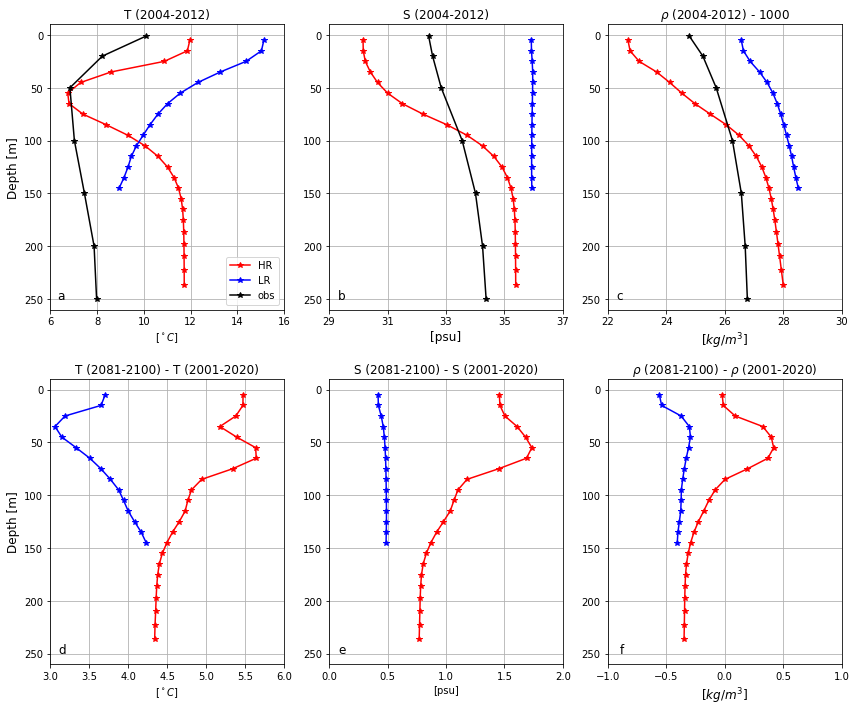

In [19]:
fig1, axs = plt.subplots(2,3,figsize=(12,10))

axs[0,0].plot(temp1_TH.sel(time=slice('2004','2012')).mean('time'), 
              temp1_TH.z_t/100,color='r',marker='*',label='HR')
axs[0,0].plot(temp1_TL.sel(time=slice('2004','2012')).mean('time'), 
              temp1_TL.z_t/100,color='b',marker='*',label='LR')
axs[0,0].plot(temp_av_obs,dpth_obs,color='k',marker='*',label='obs')
axs[0,0].set_xlim([6,16])
axs[0,0].set_ylim([-10,260])
axs[0,0].invert_yaxis()
axs[0,0].grid()
axs[0,0].set_xlabel('$[^\circ C]$')
axs[0,0].set_ylabel('Depth [m]', fontsize=12)
axs[0,0].set_title('T (2004-2012)', fontsize=12)
axs[0,0].text(6.3, 250, 'a', fontsize=12)
axs[0,0].legend()

axs[0,1].plot(salt1_TH.sel(time=slice('2004','2012')).mean('time'), 
              salt1_TH.z_t/100,color='r',marker='*',label='HR')
axs[0,1].plot(salt1_TL.sel(time=slice('2004','2012')).mean('time'), 
              salt1_TL.z_t/100,color='b',marker='*',label='LR')
axs[0,1].plot(salt_av_obs,dpth_obs,color='k',marker='*',label='obs')
axs[0,1].set_xlim([29,37])
axs[0,1].set_xticks(np.arange(29,37+1,2))
axs[0,1].set_xlabel('[psu]', fontsize=12)
axs[0,1].set_ylim([-10,260])
axs[0,1].invert_yaxis()
axs[0,1].grid()
axs[0,1].set_title('S (2004-2012)', fontsize=12)
axs[0,1].text(29.3, 250, 'b', fontsize=12)

axs[0,2].plot(rho1_TH.sel(time=slice('2004','2012')).mean('time')-1000, 
              rho1_TH.z_t/100, color='r',marker='*',label='HR')
axs[0,2].plot(rho1_TL.sel(time=slice('2004','2012')).mean('time')-1000, 
              rho1_TL.z_t/100, color='b',marker='*',label='LR')
axs[0,2].plot(rho_av_obs,dpth_obs,color='k',marker='*',label='obs')
axs[0,2].set_xlim([22,30])
axs[0,2].set_xlabel('$[kg/m^3]$', fontsize=12)
axs[0,2].set_ylim([-10,260])
axs[0,2].invert_yaxis()
axs[0,2].grid()
axs[0,2].set_title(r'$\rho$ (2004-2012) - 1000', fontsize=12)
axs[0,2].text(22.3, 250, 'c', fontsize=12)

axs[1,0].plot(temp2_TH.mean('time') - temp1_TH.mean('time'), 
              temp1_TH.z_t/100,color='r',marker='*',label='HR')
axs[1,0].plot(temp2_TL.mean('time') - temp1_TL.mean('time'), 
              temp1_TL.z_t/100,color='b',marker='*',label='LR')
axs[1,0].set_xlim([3,6])
axs[1,0].set_xlabel('$[^\circ C]$')
axs[1,0].set_ylim([-10,260])
axs[1,0].invert_yaxis()
axs[1,0].grid()
axs[1,0].set_ylabel('Depth [m]', fontsize=12)
axs[1,0].set_title('T (2081-2100) - T (2001-2020)', fontsize=12)
axs[1,0].text(3.1, 250, 'd', fontsize=12)

axs[1,1].plot(salt2_TH.mean('time') - salt1_TH.mean('time'), 
              salt1_TH.z_t/100,color='r',marker='*',label='HR')
axs[1,1].plot(salt2_TL.mean('time') - salt1_TL.mean('time'), 
              salt1_TL.z_t/100,color='b',marker='*',label='LR')
axs[1,1].set_xlim([0,2])
axs[1,1].set_xlabel('[psu]')
axs[1,1].set_ylim([-10,260])
axs[1,1].invert_yaxis()
axs[1,1].grid()
axs[1,1].set_title('S (2081-2100) - S (2001-2020)', fontsize=12)
axs[1,1].text(0.08, 250, 'e', fontsize=12)

axs[1,2].plot(rho2_TH.mean('time')-rho1_TH.mean('time'), 
              rho1_TH.z_t/100, color='r',marker='*',label='HR')
axs[1,2].plot(rho2_TL.mean('time')-rho1_TL.mean('time'), 
              rho1_TL.z_t/100, color='b',marker='*',label='LR')
axs[1,2].set_xlim([-1,1])
axs[1,2].set_xlabel('$[kg/m^3]$', fontsize=12)
axs[1,2].set_ylim([-10,260])
axs[1,2].invert_yaxis()
axs[1,2].grid()
axs[1,2].set_title(r'$\rho$ (2081-2100) - $\rho$ (2001-2020)', fontsize=12)
axs[1,2].text(-0.9, 250, 'f', fontsize=12)

fig1.tight_layout()

fig1.savefig(pic1,bbox_inches='tight')

# Appendix

In [22]:
ds1.TEMP.isel(time=0,z_t=0,nlon=slice(280,310),nlat=slice(270,350)).plot()

# ds1_GM_raw = ds1.isel(nlon=slice(350,500),nlat=slice(1600,1750)) # HR
ds1_GM_raw = ds1.isel(nlon=slice(280,310),nlat=slice(270,350)) 
lon_GM_raw = ds1_GM_raw.TLONG
lat_GM_raw = ds1_GM_raw.TLAT
ds1_GM = ds1_GM_raw.where(((lat_GM_raw > lat1+1) & (lat_GM_raw < lat2) & 
                         (lon_GM_raw > lon1) & (lon_GM_raw < lon2)), np.nan)

# ds2_GM_raw = ds2.isel(nlon=slice(350,500),nlat=slice(1600,1750)) # HR
ds2_GM_raw = ds2.isel(nlon=slice(280,310),nlat=slice(270,350)) 
ds2_GM = ds2_GM_raw.where(((lat_GM_raw > lat1+1) & (lat_GM_raw < lat2) & 
                         (lon_GM_raw > lon1) & (lon_GM_raw < lon2)), np.nan)

ds1_GM

<xarray.Dataset>
Dimensions:  (nlat: 80, nlon: 30, time: 228, z_t: 60)
Coordinates:
  * time     (time) object 2001-02-01 00:00:00 ... 2021-01-01 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(80, 30), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(80, 30), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    TEMP     (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 80, 30), meta=np.ndarray>
    SALT     (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 80, 30), meta=np.ndarray>
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-29 at 09:51:46.0
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  1378625
    tavg_sum:      2678400.0

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


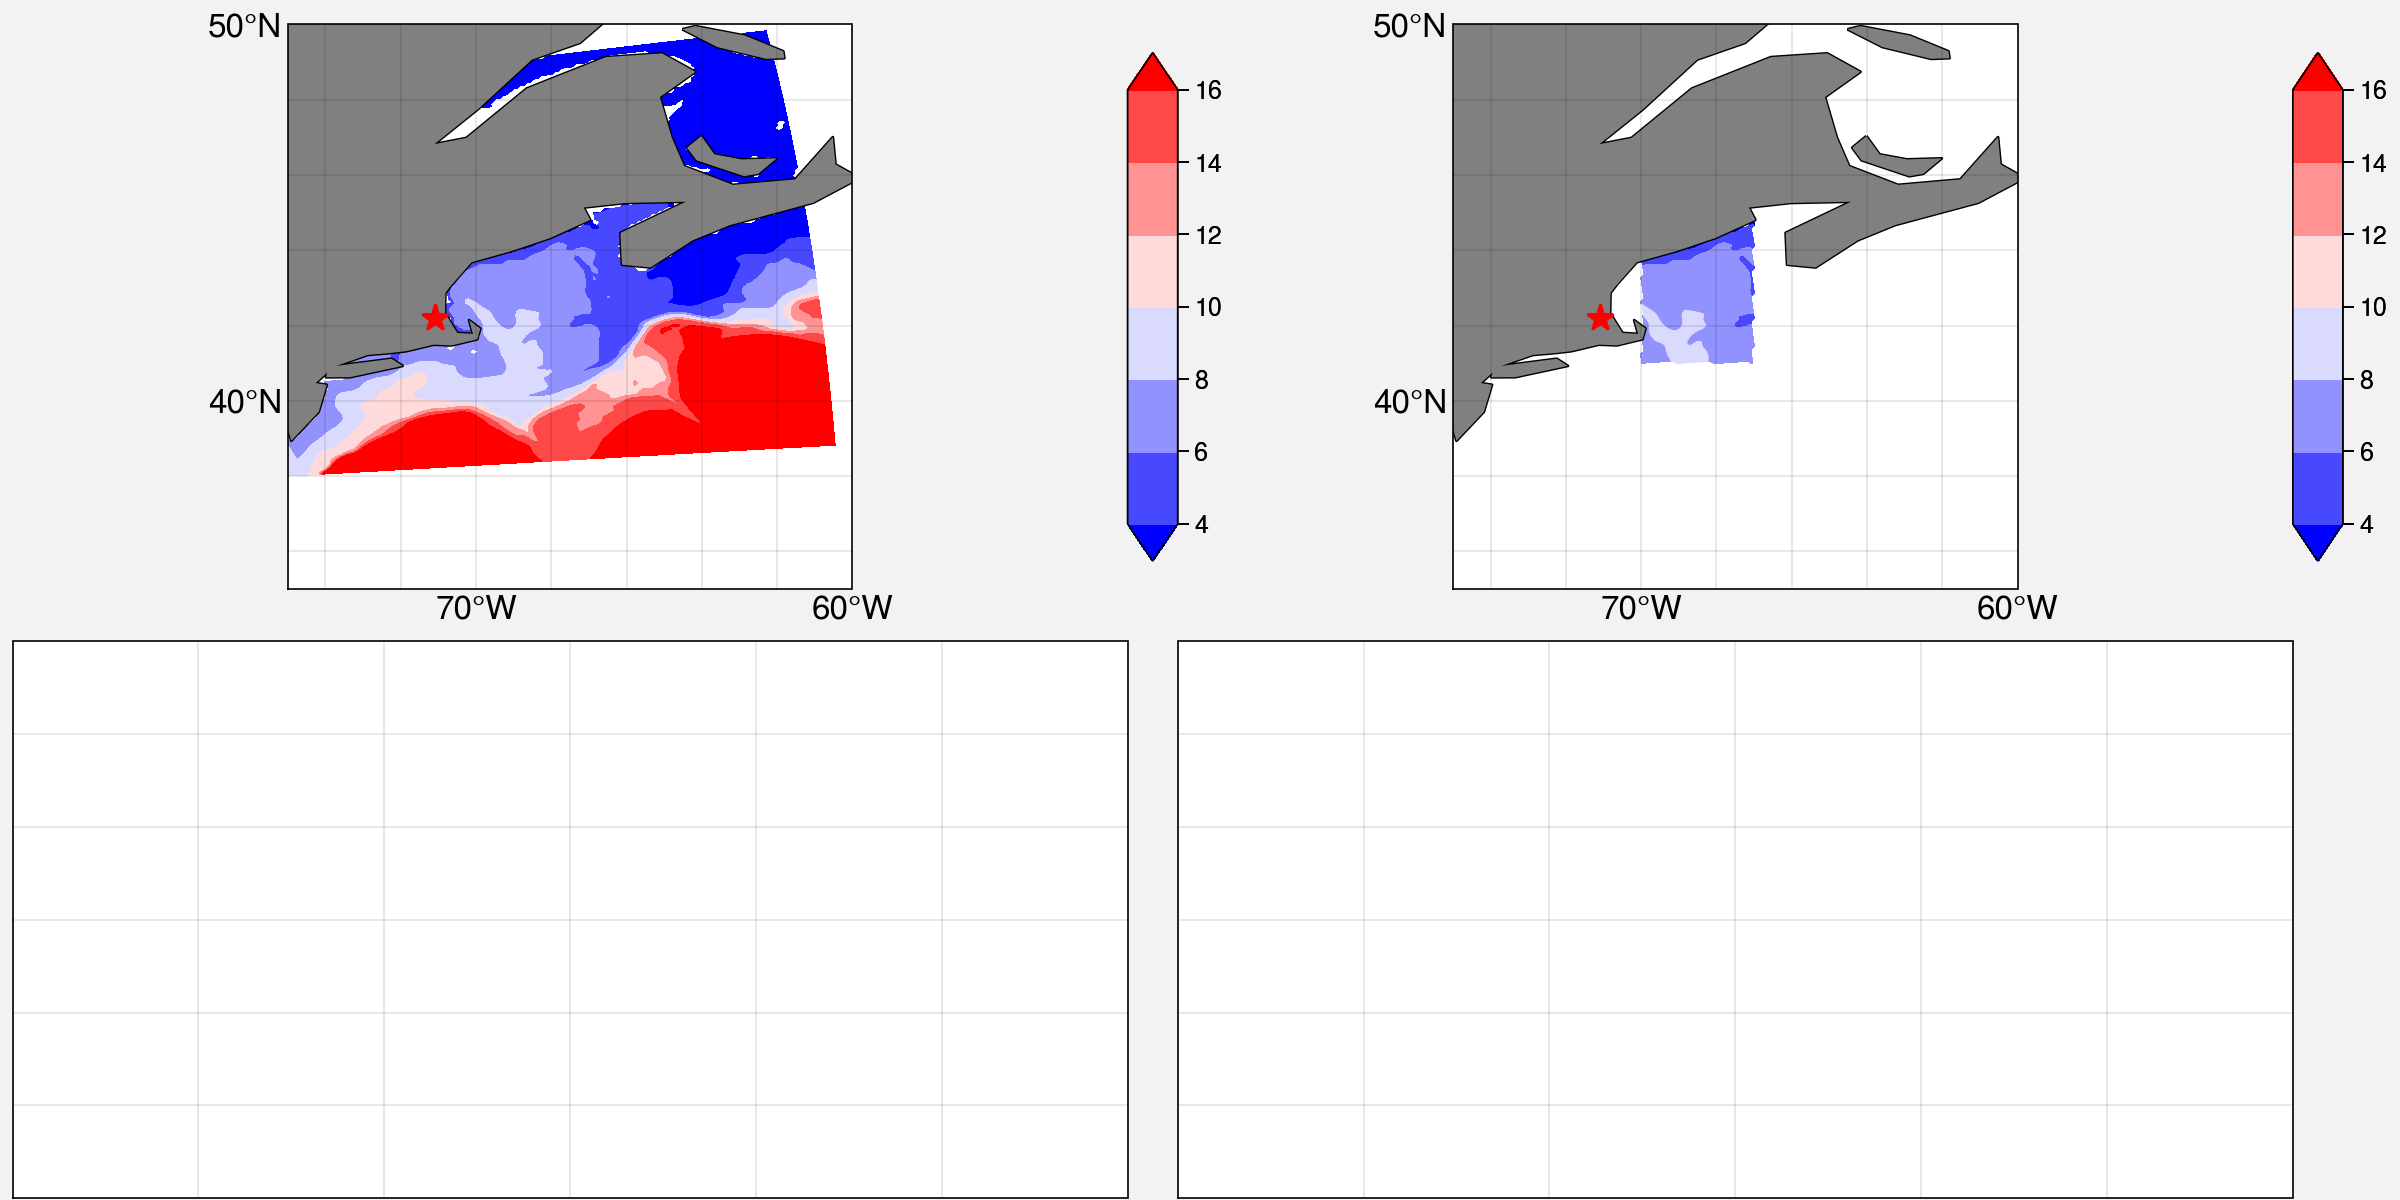

In [13]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=2, ncols=2, proj='cyl', width='12in', height='6in')
m00=axs[0,0].contourf(ds1_GM_raw.TLONG, ds1_GM_raw.TLAT, ds1_GM_raw.TEMP.isel(time=0,z_t=0),
        levels=np.arange(4,16+1,2),
        transform=pc, vmin=4, vmax=16, cmap="bwr", extend='both')
axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([-75, -60, 35, 50], crs=pc)
axs[0,0].set_xticks(np.arange(-70,-60+1,10), crs=pc)
axs[0,0].set_xticklabels(np.arange(-70,-60+1,10), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(40,50+1,10), crs=pc)
axs[0,0].set_yticklabels(np.arange(40,50+1,10), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
# axs[0,0].set_title('relative diff. between LR and ETOPO5 bathymetry', fontsize=12)
# add colorbar
cb = axs[0,0].colorbar(m00, loc='r', label='', extend='both',width='2em',shrink=0.9)

m01=axs[0,1].contourf(ds1_GM.TLONG, ds1_GM.TLAT, ds1_GM.TEMP.isel(time=0,z_t=0),
        levels=np.arange(4,16+1,2),
        transform=pc, vmin=4, vmax=16, cmap="bwr", extend='both')
axs[0,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([-75, -60, 35, 50], crs=pc)
axs[0,1].set_xticks(np.arange(-70,-60+1,10), crs=pc)
axs[0,1].set_xticklabels(np.arange(-70,-60+1,10), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(40,50+1,10), crs=pc)
axs[0,1].set_yticklabels(np.arange(40,50+1,10), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
# axs[0,0].set_title('relative diff. between LR and ETOPO5 bathymetry', fontsize=12)
# add colorbar
cb = axs[0,1].colorbar(m01, loc='r', label='', extend='both',width='2em',shrink=0.9)

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


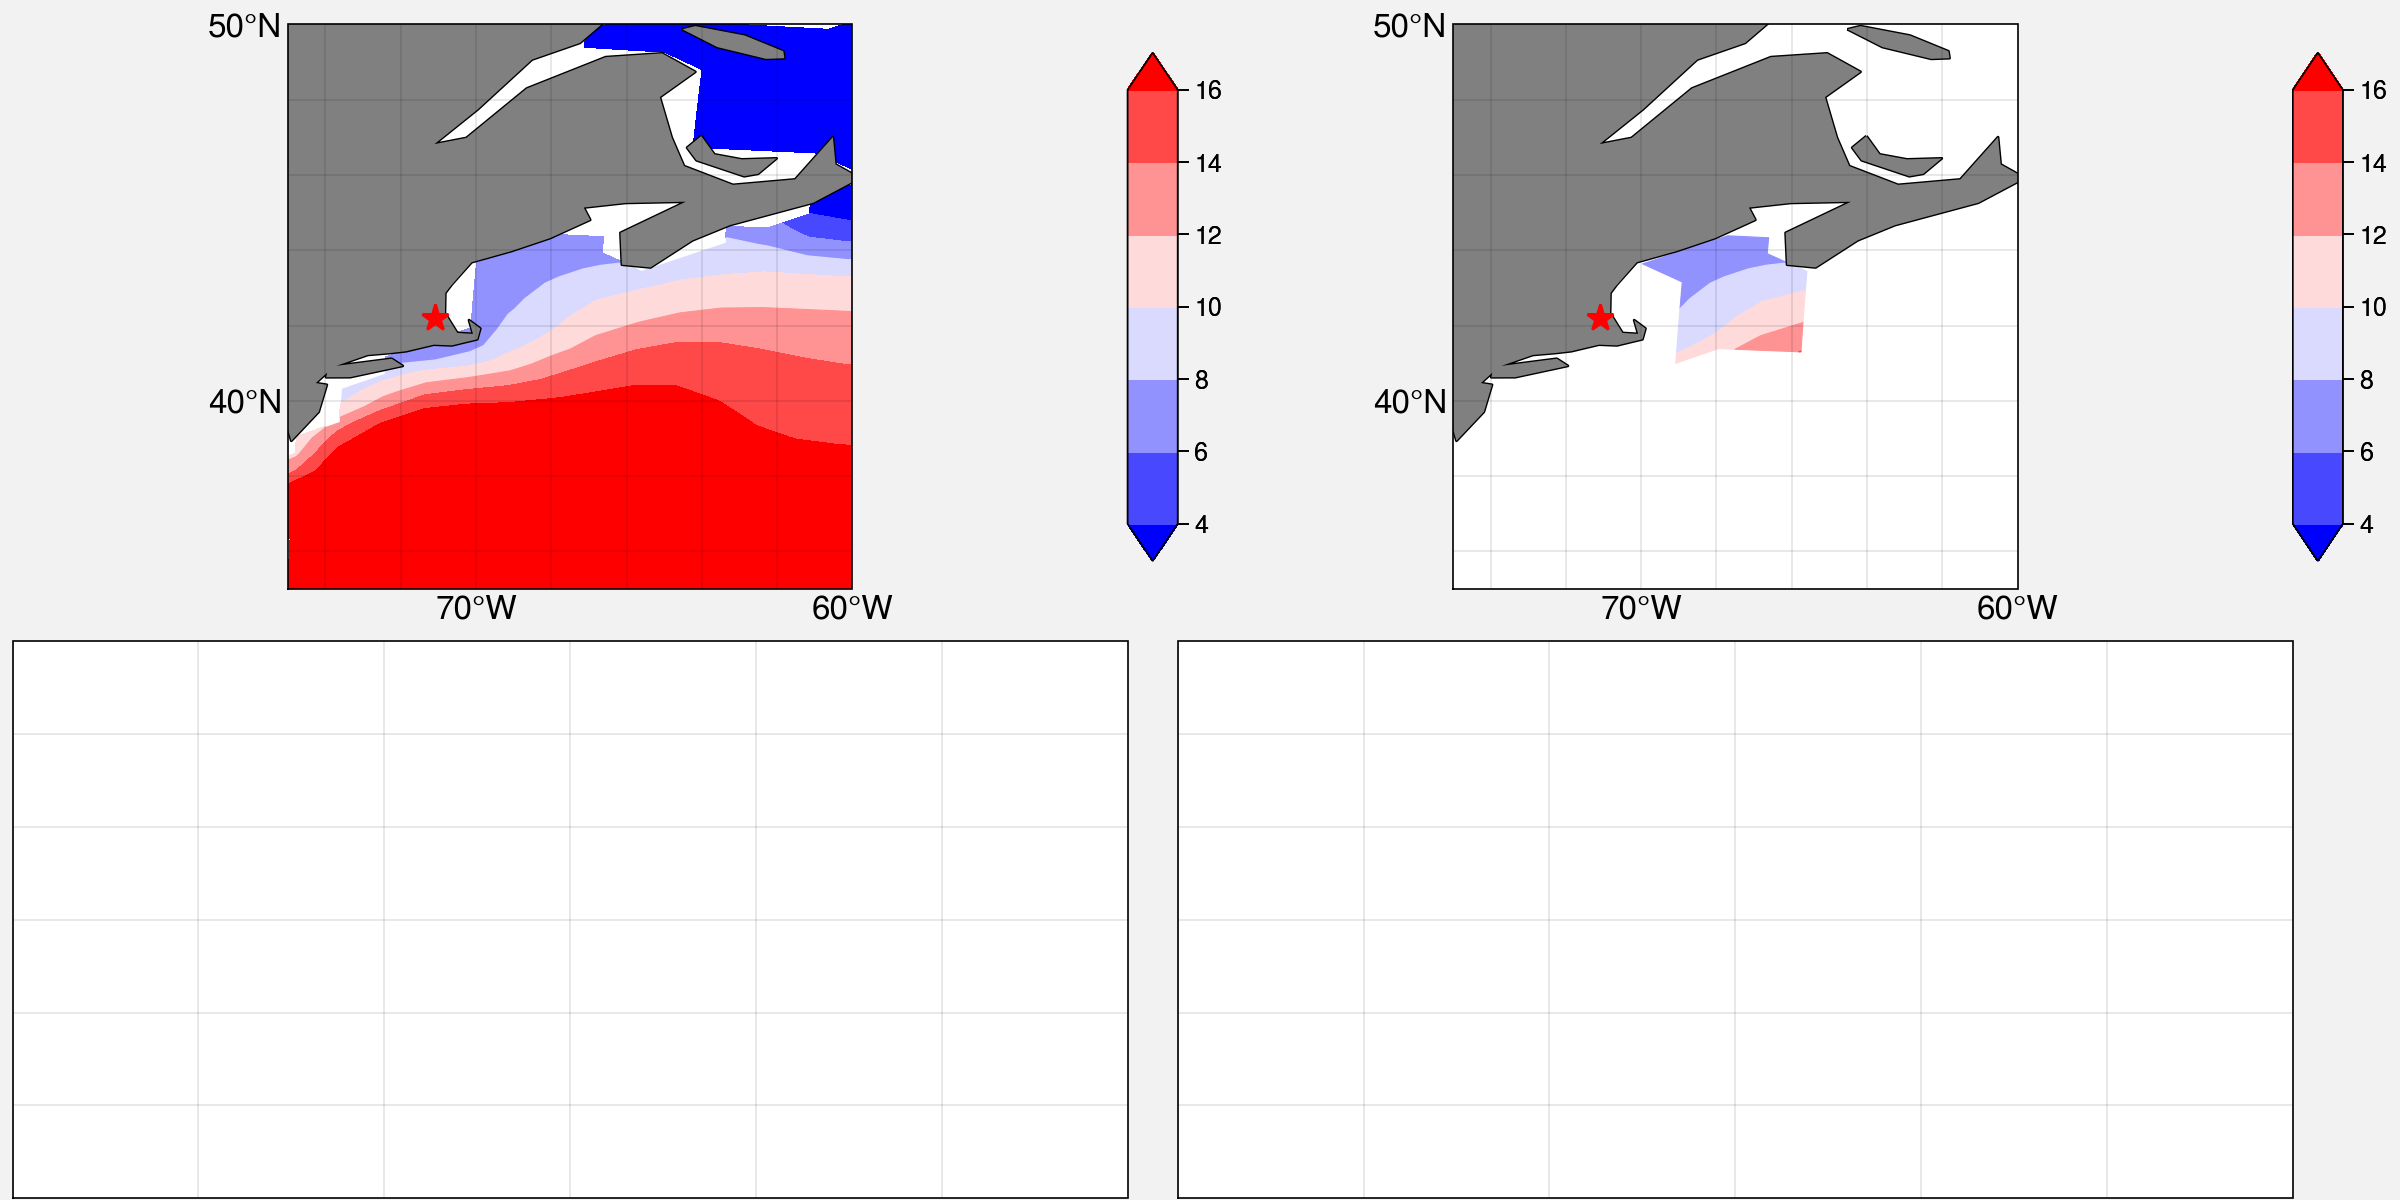

In [23]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=2, ncols=2, proj='cyl', width='12in', height='6in')
m00=axs[0,0].contourf(ds1_GM_raw.TLONG, ds1_GM_raw.TLAT, ds1_GM_raw.TEMP.isel(time=0,z_t=0),
        levels=np.arange(4,16+1,2),
        transform=pc, vmin=4, vmax=16, cmap="bwr", extend='both')
axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([-75, -60, 35, 50], crs=pc)
axs[0,0].set_xticks(np.arange(-70,-60+1,10), crs=pc)
axs[0,0].set_xticklabels(np.arange(-70,-60+1,10), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(40,50+1,10), crs=pc)
axs[0,0].set_yticklabels(np.arange(40,50+1,10), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
# axs[0,0].set_title('relative diff. between LR and ETOPO5 bathymetry', fontsize=12)
# add colorbar
cb = axs[0,0].colorbar(m00, loc='r', label='', extend='both',width='2em',shrink=0.9)

m01=axs[0,1].contourf(ds1_GM.TLONG, ds1_GM.TLAT, ds1_GM.TEMP.isel(time=0,z_t=0),
        levels=np.arange(4,16+1,2),
        transform=pc, vmin=4, vmax=16, cmap="bwr", extend='both')
axs[0,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([-75, -60, 35, 50], crs=pc)
axs[0,1].set_xticks(np.arange(-70,-60+1,10), crs=pc)
axs[0,1].set_xticklabels(np.arange(-70,-60+1,10), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(40,50+1,10), crs=pc)
axs[0,1].set_yticklabels(np.arange(40,50+1,10), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
# axs[0,0].set_title('relative diff. between LR and ETOPO5 bathymetry', fontsize=12)
# add colorbar
cb = axs[0,1].colorbar(m01, loc='r', label='', extend='both',width='2em',shrink=0.9)

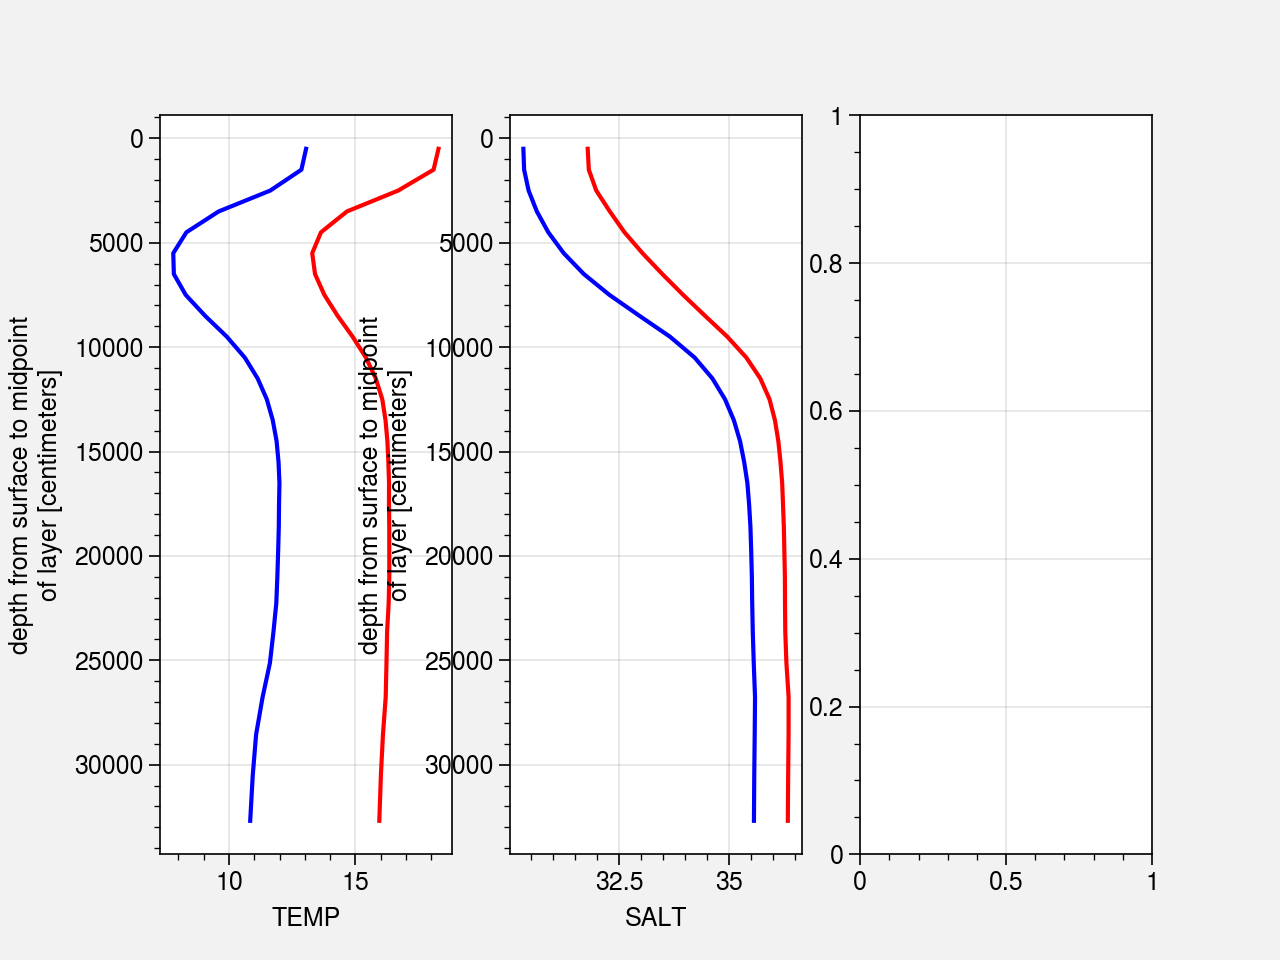

In [14]:
fig, axs = plt.subplots(1,3)
ds1_GM.TEMP.mean(('nlon','nlat','time')).plot.line(ax=axs[0], y='z_t', yincrease=False,color='b')
ds2_GM.TEMP.mean(('nlon','nlat','time')).plot.line(ax=axs[0], y='z_t', yincrease=False,color='r')
ds1_GM.SALT.mean(('nlon','nlat','time')).plot.line(ax=axs[1], y='z_t', yincrease=False,color='b')
ds2_GM.SALT.mean(('nlon','nlat','time')).plot.line(ax=axs[1], y='z_t', yincrease=False,color='r')
# rho_GM.mean(('nlon','nlat','time')).plot.line(ax=axs[2], y='z_t', yincrease=False) 

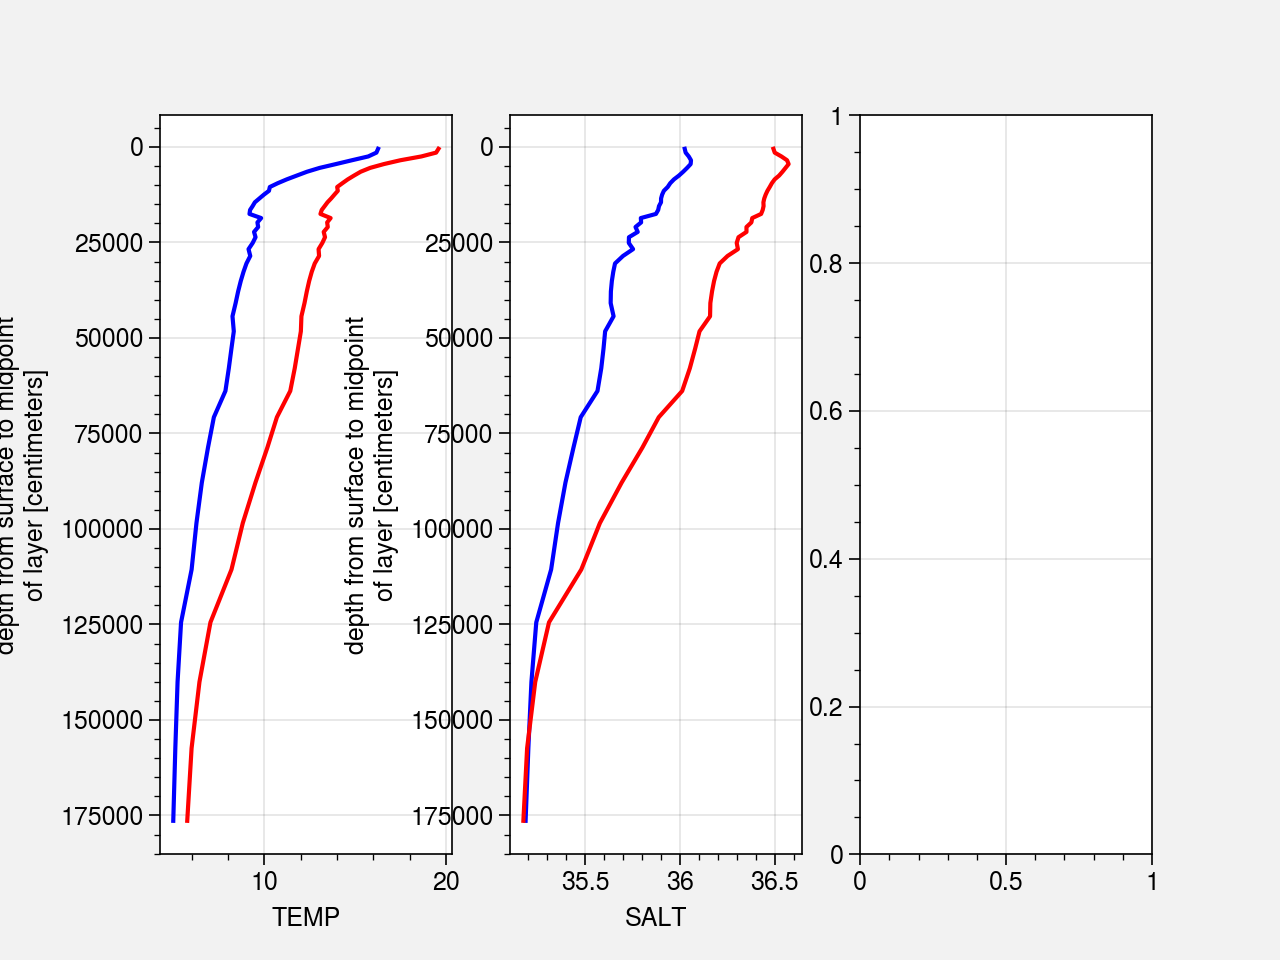

In [25]:
fig, axs = plt.subplots(1,3)
ds1_GM.TEMP.mean(('nlon','nlat','time')).plot.line(ax=axs[0], y='z_t', yincrease=False,color='b')
ds2_GM.TEMP.mean(('nlon','nlat','time')).plot.line(ax=axs[0], y='z_t', yincrease=False,color='r')
ds1_GM.SALT.mean(('nlon','nlat','time')).plot.line(ax=axs[1], y='z_t', yincrease=False,color='b')
ds2_GM.SALT.mean(('nlon','nlat','time')).plot.line(ax=axs[1], y='z_t', yincrease=False,color='r')
# rho_GM.mean(('nlon','nlat','time')).plot.line(ax=axs[2], y='z_t', yincrease=False) 

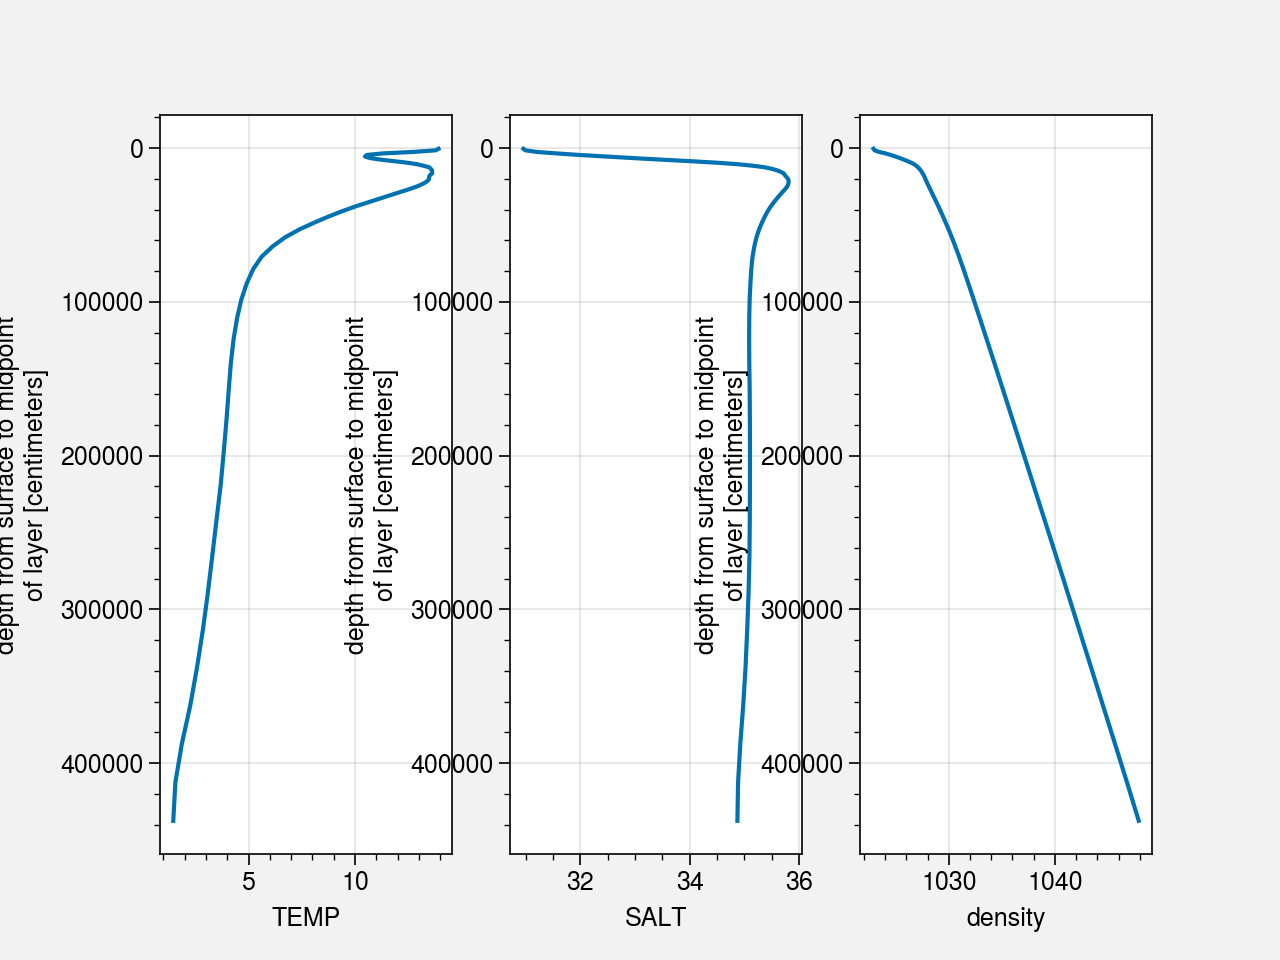

In [36]:
fig, axs = plt.subplots(1,3)
ds_GM.TEMP.mean(('nlon','nlat','time')).plot.line(ax=axs[0], y='z_t', yincrease=False)
ds_GM.SALT.mean(('nlon','nlat','time')).plot.line(ax=axs[1], y='z_t', yincrease=False)
rho_GM.mean(('nlon','nlat','time')).plot.line(ax=axs[2], y='z_t', yincrease=False) 

In [ ]:
# # infile_obs = ('/ihesp/user/dapengli/obs_dat/Argo_Roemmich_Gilson_2021May24/'
# #              'RG_ArgoClim_Temperature_2019.nc')
# infile_obs = ('/ihesp/user/dapengli/obs_dat/Argo_Roemmich_Gilson_2021May24/'
#              'RG_ArgoClim_33pfit_2019_mean.nc')
# ds_obs = xr.open_dataset(infile_obs,decode_times=False)
# ds_obs

# ds_obs.ARGO_TEMPERATURE_MEAN.isel(PRESSURE=0).plot()

# lat1,lat2=40,50
# lon1,lon2=-65+360,-55+360,
# ds_GM_obs = ds_obs.sel(LONGITUDE=slice(250,330),
#                                  LATITUDE=slice(20,60))
# ds_GM_obs.ARGO_TEMPERATURE_MEAN.isel(PRESSURE=0).plot()

# ds_obs.ARGO_TEMPERATURE_MEAN.sel(LONGITUDE=slice(lon1,lon2),
#                                  LATITUDE=slice(lat1,lat2)).isel(PRESSURE=0).plot()

# ds_obs.ARGO_TEMPERATURE_MEAN.sel(LONGITUDE=slice(lon1,lon2),
#                                  LATITUDE=slice(lat1,lat2)).mean(('LONGITUDE','LATITUDE')).plot(
#                                  y='PRESSURE',yincrease=False)